**RUN THIS CODE TO UNIZP THE REQUIRED FILES**

In [ ]:
!unzip /content/homer_bart.zip -d /content/homerbart/

Archive:  /content/homer_bart.zip
   creating: /content/homerbart/Bart/
  inflating: /content/homerbart/Bart/bart58.bmp  
  inflating: /content/homerbart/Bart/bart70.bmp  
  inflating: /content/homerbart/Bart/bart64.bmp  
  inflating: /content/homerbart/Bart/bart162.bmp  
  inflating: /content/homerbart/Bart/bart65.bmp  
  inflating: /content/homerbart/Bart/bart71.bmp  
  inflating: /content/homerbart/Bart/bart59.bmp  
  inflating: /content/homerbart/Bart/bart67.bmp  
  inflating: /content/homerbart/Bart/bart73.bmp  
  inflating: /content/homerbart/Bart/bart98.bmp  
  inflating: /content/homerbart/Bart/bart161.bmp  
  inflating: /content/homerbart/Bart/bart149.bmp  
  inflating: /content/homerbart/Bart/bart148.bmp  
  inflating: /content/homerbart/Bart/bart160.bmp  
  inflating: /content/homerbart/Bart/bart99.bmp  
  inflating: /content/homerbart/Bart/bart72.bmp  
  inflating: /content/homerbart/Bart/bart66.bmp  
  inflating: /content/homerbart/Bart/bart62.bmp  
  inflating: /content/h

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_height=64
img_width=64
batch_size=32

In [ ]:
model=keras.Sequential(
    [
        layers.Input((64,64,3)),
        layers.Flatten(),
        layers.Dense(2048, activation='relu'),
        layers.Dense(1024, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid'),

    ]
)

In [ ]:
ds_total=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/homerbart/',
#     labels='inferred',
    label_mode='binary',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height,img_width), #reshape if not in this size
    shuffle=True,
    seed=123,
)

Found 269 files belonging to 2 classes.


In [ ]:
class_names = ds_total.class_names
print(class_names)

['Bart', 'Homer']


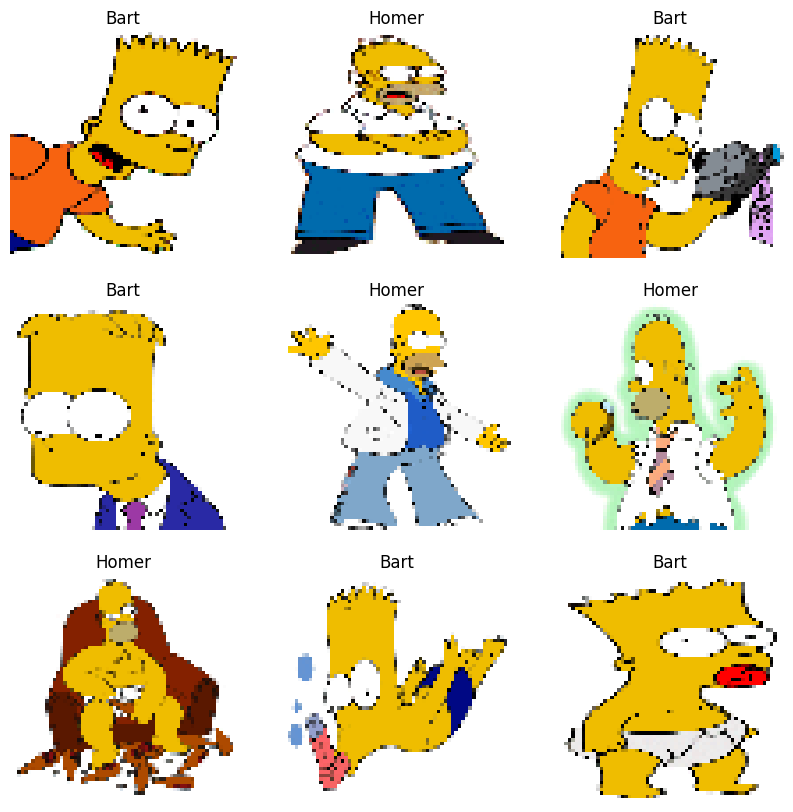

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in ds_total.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[int(labels[i])])
    plt.axis("off")

In [ ]:
# # Convert labels to the correct shape for BinaryCrossentropy
# def process_labels(labels):
#     return tf.expand_dims(tf.cast(labels, tf.float32), axis=-1)

# ds_train = ds_train.map(lambda x, y: (x, process_labels(y)))

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

normalized_ds = ds_total.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
# total_batches = tf.data.experimental.cardinality(normalized_ds)
# ds_test = normalized_ds.take(total_batches // 10)
# ds_train = normalized_ds.skip(total_batches // 10)

# Calculate the number of batches
total_batches = tf.data.experimental.cardinality(normalized_ds).numpy()

# Split the dataset into training and test sets
test_batches = round(total_batches *0.1)
train_batches = total_batches - test_batches

ds_train = normalized_ds.skip(test_batches)
ds_test = normalized_ds.take(test_batches)

In [ ]:
#training with normalization
model.compile(
    loss=keras.losses.BinaryCrossentropy(), #for passing output to sigmoid first
    optimizer=keras.optimizers.Adam(learning_rate=3e-6),
    metrics=['accuracy'],
)

model.fit(ds_train, epochs=30, verbose=2)
# model.evaluate(x_test,y_test,batch_size=32,verbose=2)

Epoch 1/30
8/8 - 3s - loss: 0.6542 - accuracy: 0.5949 - 3s/epoch - 403ms/step
Epoch 2/30
8/8 - 0s - loss: 0.5924 - accuracy: 0.7511 - 441ms/epoch - 55ms/step
Epoch 3/30
8/8 - 0s - loss: 0.5643 - accuracy: 0.7215 - 403ms/epoch - 50ms/step
Epoch 4/30
8/8 - 0s - loss: 0.5256 - accuracy: 0.7679 - 296ms/epoch - 37ms/step
Epoch 5/30
8/8 - 0s - loss: 0.4971 - accuracy: 0.8059 - 266ms/epoch - 33ms/step
Epoch 6/30
8/8 - 0s - loss: 0.4686 - accuracy: 0.7679 - 257ms/epoch - 32ms/step
Epoch 7/30
8/8 - 0s - loss: 0.4602 - accuracy: 0.8692 - 250ms/epoch - 31ms/step
Epoch 8/30
8/8 - 0s - loss: 0.4328 - accuracy: 0.8565 - 258ms/epoch - 32ms/step
Epoch 9/30
8/8 - 0s - loss: 0.4249 - accuracy: 0.8692 - 252ms/epoch - 32ms/step
Epoch 10/30
8/8 - 0s - loss: 0.4092 - accuracy: 0.8608 - 245ms/epoch - 31ms/step
Epoch 11/30
8/8 - 0s - loss: 0.3990 - accuracy: 0.8692 - 252ms/epoch - 31ms/step
Epoch 12/30
8/8 - 0s - loss: 0.3984 - accuracy: 0.8734 - 262ms/epoch - 33ms/step
Epoch 13/30
8/8 - 0s - loss: 0.3669 - a

In [ ]:
model.evaluate(ds_test,batch_size=32,verbose=2)

1/1 - 0s - loss: 0.2476 - accuracy: 1.0000 - 325ms/epoch - 325ms/step


[0.24761782586574554, 1.0]